In [2]:
import pandas as pd

# Load your top genes from TSV
sig_genes_df = pd.read_csv('../results/significant_genes.tsv', sep='\t')
gene_list = sig_genes_df['gene'].dropna().unique().tolist()

print(f"Loaded {len(gene_list)} unique genes for annotation.")

Loaded 2751 unique genes for annotation.


In [3]:
import gseapy as gp

In [4]:
enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=['GO_Biological_Process_2021', 'KEGG_2021_Human', 'Reactome_2022'],
    organism='Human',
    outdir='../results/enrichr_annotation',  # Save results to a results folder
    cutoff=0.1
)


In [32]:
# Top 5 results
enr.results.head()

# Save full result
enr.results.to_csv('../results/enrichr_annotation/enrichment_results.tsv', sep='\t', index=False)


<Axes: title={'center': 'Top Enriched Terms'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

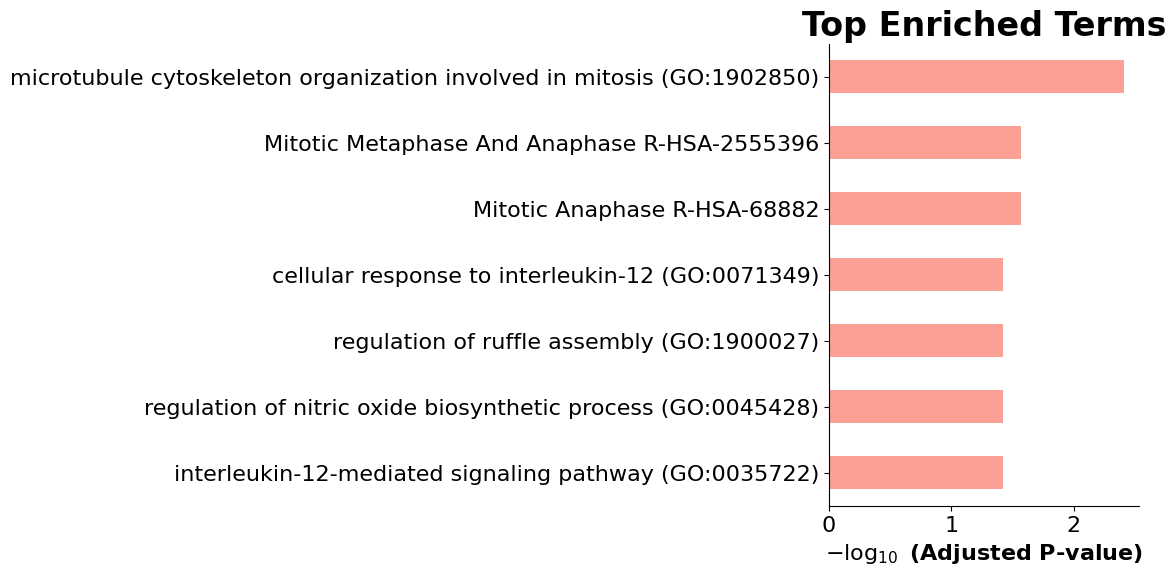

In [6]:
# Only if you have significant results
gp.barplot(enr.results, title='Top Enriched Terms')